In [1]:
import numpy as np
from tqdm.notebook import tqdm
%config InlineBackend.figure_format = 'svg'
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amsfonts}']}
plt.rcParams.update(params)

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


Text(0, 0.5, 'IDF1 ($\\uparrow$)')

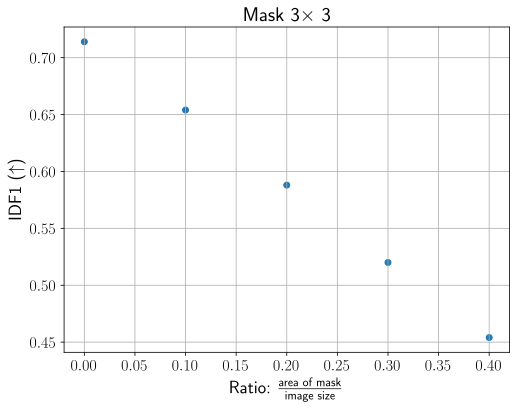

In [7]:
IDF1 = [0.714, 0.654, 0.588, 0.52, 0.454]
ratios = [0, 0.1, 0.2, 0.3, 0.4]
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(ratios, IDF1)
plt.title(r"Mask 3$\times$ 3", fontsize=20)

plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(r"Ratio: $\frac{\text{area of mask}}{\text{image size}}$", fontsize=18)
plt.ylabel(r"IDF1 ($\uparrow$)", fontsize=18)

Text(0, 0.5, 'IDF1 ($\\uparrow$)')

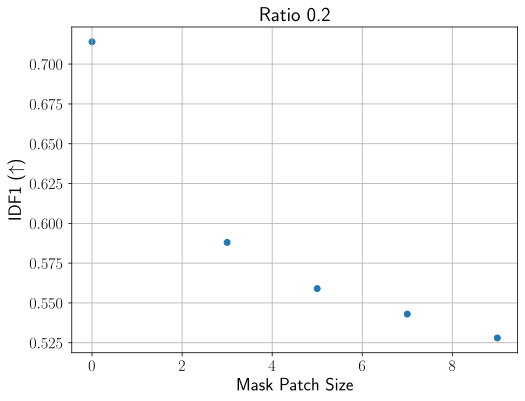

In [8]:
IDF1 = [0.714, 0.588, 0.559, 0.543, 0.528]
patch = [0, 3, 5, 7, 9]
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(patch, IDF1)
plt.title(r"Ratio 0.2", fontsize=20)

plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(r"Mask Patch Size", fontsize=18)
plt.ylabel(r"IDF1 ($\uparrow$)", fontsize=18)

In [2]:
import torch
torch.cuda.set_device(3)

In [3]:
import sys
from pathlib import Path
lib_dir = (Path(".").parent / '..').resolve()
sys.path.insert(0, str(lib_dir))

In [4]:
from mmcv import Config
from mmdet.datasets import build_dataset
# from mmdet.datasets import build_dataloader
from qdtrack.datasets import build_dataloader
import ml_collections

In [9]:
cfg = Config.fromfile("./configs/bdd100k/qdtrack-frcnn_r50_fpn_12e_bdd100k.py")
cfg.data.test.test_mode = True

In [10]:
dataset = build_dataset(cfg.data.test)

loading annotations into memory...
Done (t=2.38s)
creating index...
index created!


In [11]:
# data_loader = build_dataloader(dataset, samples_per_gpu=1, workers_per_gpu=cfg.data.workers_per_gpu, dist=False, shuffle=False)

In [12]:
data = dataset[0]

[[180, 200, 820, 840], [40, 60, 40, 60], [180, 200, 740, 760], [140, 160, 880, 900], [120, 140, 480, 500], [140, 160, 420, 440], [40, 60, 140, 160], [140, 160, 760, 780], [120, 140, 500, 520], [120, 140, 520, 540], [180, 200, 320, 340], [80, 100, 880, 900], [80, 100, 720, 740], [140, 160, 820, 840], [140, 160, 900, 920], [40, 60, 80, 100], [40, 60, 60, 80], [140, 160, 780, 800], [100, 120, 680, 700], [20, 40, 160, 180], [0, 20, 1040, 1060], [140, 160, 700, 720], [180, 200, 720, 740], [100, 120, 320, 340], [100, 120, 740, 760], [100, 120, 360, 380], [120, 140, 680, 700], [40, 60, 100, 120], [140, 160, 860, 880], [60, 80, 180, 200], [100, 120, 1080, 1100], [140, 160, 840, 860], [100, 120, 660, 680], [80, 100, 360, 380], [100, 120, 580, 600], [40, 60, 1040, 1060], [80, 100, 420, 440], [40, 60, 840, 860], [100, 120, 400, 420], [100, 120, 880, 900], [160, 180, 500, 520], [120, 140, 1080, 1100], [60, 80, 140, 160], [120, 140, 820, 840], [0, 20, 240, 260], [140, 160, 360, 380], [40, 60, 660, 

[09/20 14:05:12] matplotlib.image WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


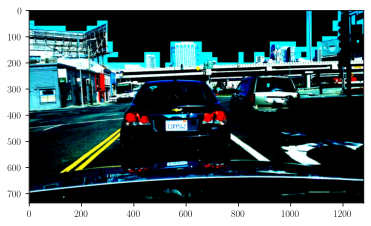

In [13]:
plt.imshow(np.transpose(data["img"][0], axes=(1, 2, 0)))

In [48]:
data["img"][0].shape

torch.Size([3, 736, 1280])